# Introduction to Artificial Neural Networks (ANN)

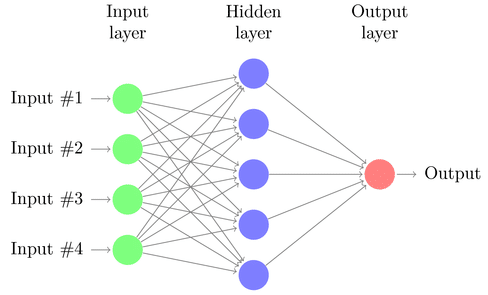

### A single neuron

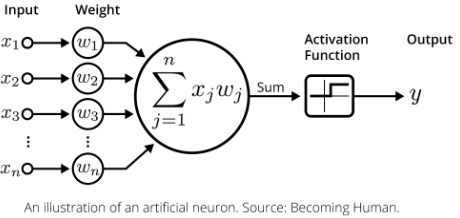

for each node the weighted sum is calculated and a bias(b) is added at the end

Sum = x1(w1) + x2(w2) + x3(w3) . . . xn(wn) + b 

The sum is passed to an activation function which returns the output value y

y=ActivationFunction(Sum)

## Popular Activation Functions

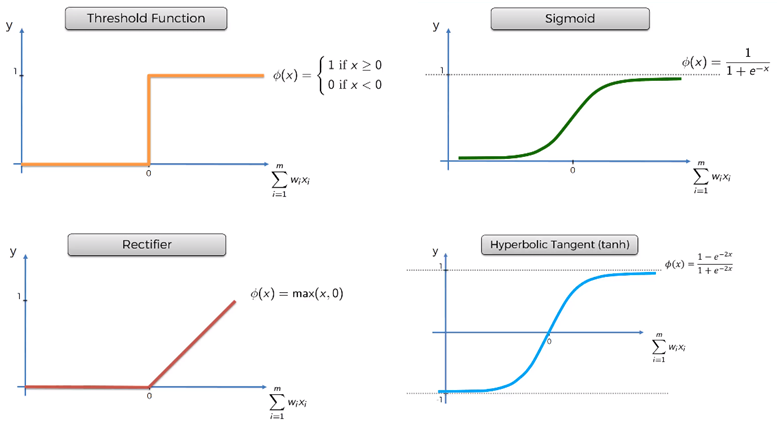

## Using ANN on CarPricesData

In [1]:
# Reading the cleaned numeric car prices data
import pandas as pd
import numpy as np

# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)

CarPricesDataNumeric=pd.read_pickle("E:/Study Stuff/DataScience/Python/Adv_ML/Deep Learning Notebooks/CarPricesDataNumeric.pkl")
CarPricesDataNumeric.head()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
0,13500,23.0,46986,90,1,0,2000.0,3,1165.0,0,1,0
1,13750,23.0,72937,90,1,0,2000.0,3,1165.0,0,1,0
2,13950,24.0,41711,90,1,0,2000.0,3,1165.0,0,1,0
3,14950,26.0,48000,90,0,0,2000.0,3,1165.0,0,1,0
4,13750,30.0,38500,90,0,0,2000.0,3,1170.0,0,1,0


## Splitting the Data into Training and Testing

In [2]:
# After Standardization of data
# Separate Target Variable and Predictor Variables
TargetVariable=['Price']
Predictors=['Age', 'KM', 'HP', 'MetColor', 'Automatic', 'CC', 'Doors',
       'Weight', 'FuelType_CNG', 'FuelType_Diesel', 'FuelType_Petrol']

X=CarPricesDataNumeric[Predictors].values
y=CarPricesDataNumeric[TargetVariable].values


### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)


# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(999, 11)
(999, 1)
(429, 11)
(429, 1)


In [4]:
# Standardized predictors
X[0:3]

array([[-1.79400224, -0.58190964, -0.76628391,  0.69377792, -0.24361277,
         2.34607519, -1.08412485,  2.10364977, -0.10976426,  2.92982809,
        -2.75724675],
       [-1.79400224,  0.11238127, -0.76628391,  0.69377792, -0.24361277,
         2.34607519, -1.08412485,  2.10364977, -0.10976426,  2.92982809,
        -2.75724675],
       [-1.73978236, -0.72303656, -0.76628391,  0.69377792, -0.24361277,
         2.34607519, -1.08412485,  2.10364977, -0.10976426,  2.92982809,
        -2.75724675]])

In [5]:
# Inverse transform will take the data back to original form
PredictorScalerFit.inverse_transform(X)[0:3]

array([[   23., 46986.,    90.,     1.,     0.,  2000.,     3.,  1165.,
            0.,     1.,     0.],
       [   23., 72937.,    90.,     1.,     0.,  2000.,     3.,  1165.,
            0.,     1.,     0.],
       [   24., 41711.,    90.,     1.,     0.,  2000.,     3.,  1165.,
            0.,     1.,     0.]])

In [6]:
# Installing required libraries
#!pip install tensorflow
#!pip install keras

## Regression using Deep Learning- Artificial Neural Networks(ANN)

In [7]:
from keras.models import Sequential
from keras.layers import Dense

In [8]:
# create ANN model
model = Sequential()

# Defining the first layer of the model
model.add(Dense(units=5, input_dim=11, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))


# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [9]:
# Fitting the ANN to the Training set
#1000/20 --- forward/backward
model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50
50/50 [==============================] - 0s 4ms/step - loss: 1.0263
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 0.9814
Epoch 3/50
50/50 [==============================] - 0s 2ms/step - loss: 0.7527
Epoch 4/50
50/50 [==============================] - 0s 2ms/step - loss: 0.4367
Epoch 5/50
50/50 [==============================] - 0s 2ms/step - loss: 0.2815
Epoch 6/50
50/50 [==============================] - 0s 2ms/step - loss: 0.2229
Epoch 7/50
50/50 [==============================] - 0s 1ms/step - loss: 0.1930
Epoch 8/50
50/50 [==============================] - 0s 1ms/step - loss: 0.1742
Epoch 9/50
50/50 [==============================] - 0s 2ms/step - loss: 0.1608
Epoch 10/50
50/50 [==============================] - 0s 2ms/step - loss: 0.1519
Epoch 11/50
50/50 [==============================] - 0s 2ms/step - loss: 0.1460
Epoch 12/50
50/50 [==============================] - 0s 2ms/step - loss: 0.1409
Epoch 13/50
50/50 [==============================

## Finding best set of parameters using manual grid search

In [10]:
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=10, input_dim=11, kernel_initializer='normal', activation='relu'))

            # Defining the Second layer of the model
            model.add(Dense(units=5, input_dim=20, kernel_initializer='normal', activation='relu'))

            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))

            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')

            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = 10, verbose=0)

            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)

In [11]:
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 76.45255923138782
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 84.23668275376262
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 78.46451636927142
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 77.65523668395012
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 76.66306856104752
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 75.65253737034459
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 89.29959048261921
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 79.16895532471952
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 72.12495867265577
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 74.85403052853388
11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 76.81381071127643
12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 75.77180638147018
13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 71.17365595177759
14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 90.61748684553189
15 Parameters: batch

### Plotting the parameter search results

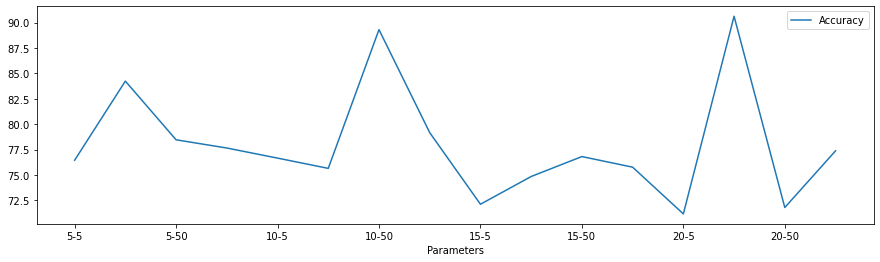

In [12]:
%matplotlib inline
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

### Generating the model using best hyperparameters

In [30]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 10, verbose=0)

### Generating the predictions on Testing Data

In [31]:
# Predictions on testing data
Predictions=model.predict(X_test)

# Scaling the predicted Price data back to original price scale
Predictions=TargetVarScalerFit.inverse_transform(Predictions)

# Scaling the y_test Price data back to original price scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Price']=y_test_orig
TestingData['PredictedPrice']=Predictions
TestingData.head()

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol,Price,PredictedPrice
0,20.0,35000.0,97.0,1.0,0.0,1400.0,5.0,1110.0,0.0,0.0,1.0,16500.0,16991.826172
1,76.0,89520.0,110.0,1.0,0.0,1600.0,3.0,1050.0,0.0,0.0,1.0,8950.0,7924.141113
2,56.0,66777.0,110.0,0.0,0.0,1600.0,5.0,1090.0,0.0,0.0,1.0,11950.0,10828.864258
3,39.0,24723.0,110.0,1.0,1.0,1600.0,4.0,1060.0,0.0,0.0,1.0,12695.0,12523.749023
4,68.0,35000.0,110.0,1.0,0.0,1600.0,3.0,1050.0,0.0,0.0,1.0,8900.0,9374.657227


In [32]:
# Comparing a sample row from original data to confirm if the reverse transform has happend correctly
CarPricesDataNumeric[CarPricesDataNumeric['KM']==89520]

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol
1197,8950,76.0,89520,110,1,0,1600.0,3,1050.0,0,0,1


### Calculating the Accuracy on Testing Data

In [33]:
APE=100* (abs(TestingData['Price']-TestingData['PredictedPrice'])/TestingData['Price'])
TestingData['APE']=APE
print('The Accuracy of ANN model is:', 100-np.mean(APE))
TestingData.head()

The Accuracy of ANN model is: 92.17194641099971


,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol,Price,PredictedPrice,APE
0,20.0,35000.0,97.0,1.0,0.0,1400.0,5.0,1110.0,0.0,0.0,1.0,16500.0,16991.826172,2.980765
1,76.0,89520.0,110.0,1.0,0.0,1600.0,3.0,1050.0,0.0,0.0,1.0,8950.0,7924.141113,11.462110
2,56.0,66777.0,110.0,0.0,0.0,1600.0,5.0,1090.0,0.0,0.0,1.0,11950.0,10828.864258,9.381889
3,39.0,24723.0,110.0,1.0,1.0,1600.0,4.0,1060.0,0.0,0.0,1.0,12695.0,12523.749023,1.348964
4,68.0,35000.0,110.0,1.0,0.0,1600.0,3.0,1050.0,0.0,0.0,1.0,8900.0,9374.657227,5.333227


### Analyzing the errors

In [34]:
# Printing top 10 errors made by model
TestingData.sort_values(by='APE', ascending=False).head(10)

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol,Price,PredictedPrice,APE
295,44.0,131273.0,69.0,1.0,0.0,1800.0,5.0,1110.0,0.0,1.0,0.0,4750.0,9590.772461,101.910999
242,74.0,203254.0,72.0,1.0,0.0,2000.0,3.0,1135.0,0.0,1.0,0.0,4400.0,6722.135254,52.775801
143,58.0,69022.0,86.0,1.0,0.0,1300.0,5.0,1035.0,0.0,0.0,1.0,6950.0,9722.424805,39.891004
180,71.0,134660.0,72.0,0.0,0.0,2000.0,5.0,1135.0,0.0,1.0,0.0,5950.0,7938.371094,33.418002
16,44.0,71793.0,110.0,1.0,0.0,1600.0,4.0,1067.0,1.0,0.0,0.0,14950.0,10282.078125,31.223558
268,69.0,58952.0,110.0,1.0,0.0,1600.0,3.0,1050.0,0.0,0.0,1.0,6900.0,8959.617188,29.849524
256,72.0,105856.0,86.0,0.0,0.0,1300.0,3.0,1015.0,0.0,0.0,1.0,5950.0,7656.657227,28.683315
192,67.0,58058.0,110.0,1.0,0.0,1600.0,3.0,1065.0,0.0,0.0,1.0,12950.0,9282.428711,28.321014
334,71.0,64000.0,110.0,1.0,0.0,1600.0,5.0,1070.0,0.0,0.0,1.0,6999.0,8966.926758,28.117256
193,36.0,36269.0,110.0,1.0,0.0,1600.0,5.0,1075.0,0.0,0.0,1.0,10750.0,13720.156250,27.629360


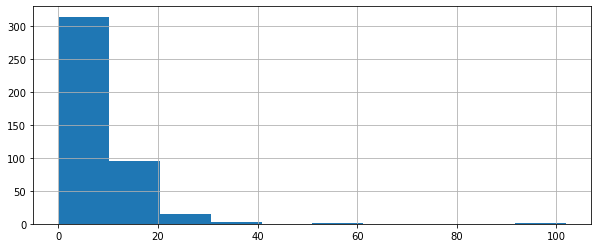

In [35]:
# Looking at the distribution is errors
%matplotlib inline
TestingData['APE'].hist(figsize=(10,4))

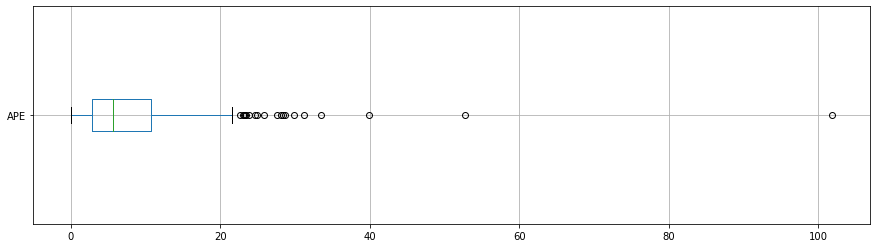

In [36]:
TestingData.boxplot(column='APE', figsize=(15,4), vert=False)

## Sklearn GridSearchCV 

In [42]:
# Function to generate Deep ANN model 
def make_regression_ann(Optimizer_trial,actFunctionTrial):
    from keras.models import Sequential
    from keras.layers import Dense
    
    model = Sequential()
    model.add(Dense(units=10, input_dim=11, kernel_initializer='normal', activation=actFunctionTrial))
    model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=Optimizer_trial)
    return model

In [43]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor


Parameter_Trials={'batch_size':[10,20,30],
                      'epochs':[10,20],
                    'Optimizer_trial':['adam', 'rmsprop'],
                  'actFunctionTrial':['tanh','relu']
                 }


RegModel=KerasRegressor(make_regression_ann, verbose=0)

In [44]:
from sklearn.metrics import make_scorer

# Defining a custom function to calculate accuracy
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

In [45]:
# Creating the Grid search space
# See different scoring methods by using sklearn.metrics.SCORERS.keys()
grid_search=GridSearchCV(estimator=RegModel, param_grid=Parameter_Trials, scoring=custom_Scoring, cv=5)

In [46]:
# Measuring how much time it took to find the best params
import time
StartTime=time.time()

# Running Grid Search for different paramenters
grid_search.fit(X,y, verbose=1)

EndTime=time.time()
print("########## Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes')

Epoch 1/10
115/115 [==============================] - 0s 1ms/step - loss: 0.2991
Epoch 2/10
115/115 [==============================] - 0s 1ms/step - loss: 0.1427
Epoch 3/10
115/115 [==============================] - 0s 1ms/step - loss: 0.1223
Epoch 4/10
115/115 [==============================] - 0s 1ms/step - loss: 0.1139
Epoch 5/10
115/115 [==============================] - 0s 1ms/step - loss: 0.1077
Epoch 6/10
115/115 [==============================] - 0s 1ms/step - loss: 0.1050
Epoch 7/10
115/115 [==============================] - 0s 1ms/step - loss: 0.1019
Epoch 8/10
115/115 [==============================] - 0s 1ms/step - loss: 0.1002
Epoch 9/10
115/115 [==============================] - 0s 1ms/step - loss: 0.0986
Epoch 10/10
115/115 [==============================] - 0s 1ms/step - loss: 0.0966
###################################################################### Accuracy: 25.96555512897217
Epoch 1/10
115/115 [==============================] - 0s 2ms/step - loss: 1.0559
Epoch 2/1

###################################################################### Accuracy: -7.328368149854057
Epoch 1/20
115/115 [==============================] - 0s 1ms/step - loss: 1.0936
Epoch 2/20
115/115 [==============================] - 0s 1ms/step - loss: 0.4821
Epoch 3/20
115/115 [==============================] - 0s 1ms/step - loss: 0.1821
Epoch 4/20
115/115 [==============================] - 0s 1ms/step - loss: 0.1522
Epoch 5/20
115/115 [==============================] - 0s 1ms/step - loss: 0.1413
Epoch 6/20
115/115 [==============================] - 0s 1ms/step - loss: 0.1344
Epoch 7/20
115/115 [==============================] - 0s 1ms/step - loss: 0.1288
Epoch 8/20
115/115 [==============================] - 0s 1ms/step - loss: 0.1238
Epoch 9/20
115/115 [==============================] - 0s 1ms/step - loss: 0.1207
Epoch 10/20
115/115 [==============================] - 0s 1ms/step - loss: 0.1171
Epoch 11/20
115/115 [==============================] - 0s 1ms/step - loss: 0.1139
Epoch 1

58/58 [==============================] - 0s 2ms/step - loss: 0.8758
Epoch 4/10
58/58 [==============================] - 0s 2ms/step - loss: 0.8111
Epoch 5/10
58/58 [==============================] - 0s 2ms/step - loss: 0.7644
Epoch 6/10
58/58 [==============================] - 0s 1ms/step - loss: 0.7252
Epoch 7/10
58/58 [==============================] - 0s 2ms/step - loss: 0.6920
Epoch 8/10
58/58 [==============================] - 0s 2ms/step - loss: 0.6615
Epoch 9/10
58/58 [==============================] - 0s 2ms/step - loss: 0.6337
Epoch 10/10
58/58 [==============================] - 0s 1ms/step - loss: 0.6088
###################################################################### Accuracy: 125.15113240029306
Epoch 1/10
58/58 [==============================] - 0s 2ms/step - loss: 1.0736
Epoch 2/10
58/58 [==============================] - 0s 2ms/step - loss: 0.9093
Epoch 3/10
58/58 [==============================] - 0s 2ms/step - loss: 0.5349
Epoch 4/10
58/58 [=======================

58/58 [==============================] - 0s 2ms/step - loss: 0.1088
Epoch 20/20
58/58 [==============================] - 0s 2ms/step - loss: 0.1079
###################################################################### Accuracy: 115.94198603742913
Epoch 1/20
58/58 [==============================] - 0s 2ms/step - loss: 1.0723
Epoch 2/20
58/58 [==============================] - 0s 2ms/step - loss: 0.9079
Epoch 3/20
58/58 [==============================] - 0s 2ms/step - loss: 0.5336
Epoch 4/20
58/58 [==============================] - 0s 2ms/step - loss: 0.2809
Epoch 5/20
58/58 [==============================] - 0s 2ms/step - loss: 0.1929
Epoch 6/20
58/58 [==============================] - 0s 2ms/step - loss: 0.1592
Epoch 7/20
58/58 [==============================] - 0s 2ms/step - loss: 0.1442
Epoch 8/20
58/58 [==============================] - 0s 2ms/step - loss: 0.1372
Epoch 9/20
58/58 [==============================] - 0s 2ms/step - loss: 0.1316
Epoch 10/20
58/58 [======================

39/39 [==============================] - 0s 2ms/step - loss: 1.1784
Epoch 2/20
39/39 [==============================] - 0s 2ms/step - loss: 1.1351
Epoch 3/20
39/39 [==============================] - 0s 2ms/step - loss: 0.9644
Epoch 4/20
39/39 [==============================] - 0s 2ms/step - loss: 0.6423
Epoch 5/20
39/39 [==============================] - 0s 2ms/step - loss: 0.3469
Epoch 6/20
39/39 [==============================] - 0s 2ms/step - loss: 0.1860
Epoch 7/20
39/39 [==============================] - 0s 2ms/step - loss: 0.1432
Epoch 8/20
39/39 [==============================] - 0s 2ms/step - loss: 0.1321
Epoch 9/20
39/39 [==============================] - 0s 2ms/step - loss: 0.1264
Epoch 10/20
39/39 [==============================] - 0s 2ms/step - loss: 0.1220
Epoch 11/20
39/39 [==============================] - 0s 2ms/step - loss: 0.1202
Epoch 12/20
39/39 [==============================] - 0s 2ms/step - loss: 0.1168
Epoch 13/20
39/39 [==============================] - 0s 2ms/

115/115 [==============================] - 0s 1ms/step - loss: 0.0961
Epoch 8/10
115/115 [==============================] - 0s 1ms/step - loss: 0.0945
Epoch 9/10
115/115 [==============================] - 0s 1ms/step - loss: 0.0933
Epoch 10/10
115/115 [==============================] - 0s 1ms/step - loss: 0.0917
###################################################################### Accuracy: -31.01216940066658
Epoch 1/10
115/115 [==============================] - 0s 1ms/step - loss: 1.1556
Epoch 2/10
115/115 [==============================] - 0s 1ms/step - loss: 0.6290
Epoch 3/10
115/115 [==============================] - 0s 1ms/step - loss: 0.1534
Epoch 4/10
115/115 [==============================] - 0s 1ms/step - loss: 0.1259
Epoch 5/10
115/115 [==============================] - 0s 1ms/step - loss: 0.1196
Epoch 6/10
115/115 [==============================] - 0s 1ms/step - loss: 0.1152
Epoch 7/10
115/115 [==============================] - 0s 1ms/step - loss: 0.1143
Epoch 8/10
115/115 

115/115 [==============================] - 0s 1ms/step - loss: 0.1061
###################################################################### Accuracy: 148.872336254552
Epoch 1/20
115/115 [==============================] - 0s 1ms/step - loss: 1.0736
Epoch 2/20
115/115 [==============================] - 0s 1ms/step - loss: 0.4654
Epoch 3/20
115/115 [==============================] - 0s 1ms/step - loss: 0.1392
Epoch 4/20
115/115 [==============================] - 0s 1ms/step - loss: 0.1225
Epoch 5/20
115/115 [==============================] - 0s 1ms/step - loss: 0.1177
Epoch 6/20
115/115 [==============================] - 0s 1ms/step - loss: 0.1155
Epoch 7/20
115/115 [==============================] - 0s 1ms/step - loss: 0.1138
Epoch 8/20
115/115 [==============================] - 0s 1ms/step - loss: 0.1118
Epoch 9/20
115/115 [==============================] - 0s 1ms/step - loss: 0.1104
Epoch 10/20
115/115 [==============================] - 0s 1ms/step - loss: 0.1102
Epoch 11/20
115/115 [

58/58 [==============================] - 0s 1ms/step - loss: 0.2372
Epoch 3/20
58/58 [==============================] - ETA: 0s - loss: 0.165 - 0s 1ms/step - loss: 0.1600
Epoch 4/20
58/58 [==============================] - 0s 1ms/step - loss: 0.1390
Epoch 5/20
58/58 [==============================] - 0s 1ms/step - loss: 0.1258
Epoch 6/20
58/58 [==============================] - 0s 1ms/step - loss: 0.1175
Epoch 7/20
58/58 [==============================] - 0s 1ms/step - loss: 0.1134
Epoch 8/20
58/58 [==============================] - 0s 1ms/step - loss: 0.1103
Epoch 9/20
58/58 [==============================] - 0s 2ms/step - loss: 0.1071
Epoch 10/20
58/58 [==============================] - 0s 1ms/step - loss: 0.1049
Epoch 11/20
58/58 [==============================] - 0s 1ms/step - loss: 0.1035
Epoch 12/20
58/58 [==============================] - 0s 1ms/step - loss: 0.1016
Epoch 13/20
58/58 [==============================] - 0s 1ms/step - loss: 0.1003
Epoch 14/20
58/58 [================

58/58 [==============================] - 0s 1ms/step - loss: 0.1092
Epoch 20/20
58/58 [==============================] - 0s 1ms/step - loss: 0.1079
###################################################################### Accuracy: 132.34441463482878
Epoch 1/10
39/39 [==============================] - 0s 2ms/step - loss: 0.3914
Epoch 2/10
39/39 [==============================] - 0s 1ms/step - loss: 0.3510
Epoch 3/10
39/39 [==============================] - ETA: 0s - loss: 0.322 - 0s 1ms/step - loss: 0.2837
Epoch 4/10
39/39 [==============================] - 0s 1ms/step - loss: 0.1929
Epoch 5/10
39/39 [==============================] - 0s 1ms/step - loss: 0.1327
Epoch 6/10
39/39 [==============================] - 0s 2ms/step - loss: 0.1088
Epoch 7/10
39/39 [==============================] - 0s 1ms/step - loss: 0.0956
Epoch 8/10
39/39 [==============================] - 0s 1ms/step - loss: 0.0909
Epoch 9/10
39/39 [==============================] - 0s 1ms/step - loss: 0.0883
Epoch 10/10
39/39

39/39 [==============================] - 0s 2ms/step - loss: 1.1207
Epoch 3/20
39/39 [==============================] - 0s 2ms/step - loss: 0.9767
Epoch 4/20
39/39 [==============================] - 0s 1ms/step - loss: 0.7179
Epoch 5/20
39/39 [==============================] - 0s 2ms/step - loss: 0.4416
Epoch 6/20
39/39 [==============================] - 0s 1ms/step - loss: 0.2375
Epoch 7/20
39/39 [==============================] - 0s 2ms/step - loss: 0.1563
Epoch 8/20
39/39 [==============================] - 0s 2ms/step - loss: 0.1332
Epoch 9/20
39/39 [==============================] - 0s 1ms/step - loss: 0.1239
Epoch 10/20
39/39 [==============================] - 0s 2ms/step - loss: 0.1192
Epoch 11/20
39/39 [==============================] - 0s 2ms/step - loss: 0.1165
Epoch 12/20
39/39 [==============================] - 0s 2ms/step - loss: 0.1150
Epoch 13/20
39/39 [==============================] - 0s 1ms/step - loss: 0.1129
Epoch 14/20
39/39 [==============================] - 0s 2ms

115/115 [==============================] - 0s 1ms/step - loss: 0.1809
Epoch 7/10
115/115 [==============================] - 0s 1ms/step - loss: 0.1559
Epoch 8/10
115/115 [==============================] - 0s 2ms/step - loss: 0.1416
Epoch 9/10
115/115 [==============================] - 0s 1ms/step - loss: 0.1360
Epoch 10/10
115/115 [==============================] - 0s 1ms/step - loss: 0.1305
###################################################################### Accuracy: 110.37880507528723
Epoch 1/10
115/115 [==============================] - 0s 1ms/step - loss: 1.0487
Epoch 2/10
115/115 [==============================] - 0s 1ms/step - loss: 0.8790
Epoch 3/10
115/115 [==============================] - 0s 1ms/step - loss: 0.7884
Epoch 4/10
115/115 [==============================] - 0s 1ms/step - loss: 0.7238
Epoch 5/10
115/115 [==============================] - 0s 1ms/step - loss: 0.6651
Epoch 6/10
115/115 [==============================] - 0s 1ms/step - loss: 0.6164
Epoch 7/10
115/115 

115/115 [==============================] - 0s 1ms/step - loss: 0.1062
###################################################################### Accuracy: 118.00824919148667
Epoch 1/20
115/115 [==============================] - 0s 1ms/step - loss: 1.0067
Epoch 2/20
115/115 [==============================] - 0s 1ms/step - loss: 0.6066
Epoch 3/20
115/115 [==============================] - 0s 1ms/step - loss: 0.2615
Epoch 4/20
115/115 [==============================] - 0s 1ms/step - loss: 0.1704
Epoch 5/20
115/115 [==============================] - 0s 1ms/step - loss: 0.1443
Epoch 6/20
115/115 [==============================] - 0s 1ms/step - loss: 0.1337
Epoch 7/20
115/115 [==============================] - 0s 1ms/step - loss: 0.1275
Epoch 8/20
115/115 [==============================] - 0s 1ms/step - loss: 0.1229
Epoch 9/20
115/115 [==============================] - 0s 1ms/step - loss: 0.1195
Epoch 10/20
115/115 [==============================] - 0s 1ms/step - loss: 0.1157
Epoch 11/20
115/115

58/58 [==============================] - 0s 1ms/step - loss: 0.9682
Epoch 3/20
58/58 [==============================] - 0s 1ms/step - loss: 0.7780
Epoch 4/20
58/58 [==============================] - 0s 1ms/step - loss: 0.6215
Epoch 5/20
58/58 [==============================] - 0s 1ms/step - loss: 0.4748
Epoch 6/20
58/58 [==============================] - 0s 1ms/step - loss: 0.3375
Epoch 7/20
58/58 [==============================] - 0s 1ms/step - loss: 0.2382
Epoch 8/20
58/58 [==============================] - 0s 1ms/step - loss: 0.1834
Epoch 9/20
58/58 [==============================] - ETA: 0s - loss: 0.164 - 0s 1ms/step - loss: 0.1551
Epoch 10/20
58/58 [==============================] - 0s 2ms/step - loss: 0.1407
Epoch 11/20
58/58 [==============================] - 0s 1ms/step - loss: 0.1312
Epoch 12/20
58/58 [==============================] - 0s 1ms/step - loss: 0.1249
Epoch 13/20
58/58 [==============================] - 0s 1ms/step - loss: 0.1206
Epoch 14/20
58/58 [================

39/39 [==============================] - 0s 2ms/step - loss: 0.1444
Epoch 9/10
39/39 [==============================] - 0s 1ms/step - loss: 0.1319
Epoch 10/10
39/39 [==============================] - 0s 1ms/step - loss: 0.1263
###################################################################### Accuracy: -62.96376277531928
Epoch 1/10
39/39 [==============================] - 0s 1ms/step - loss: 1.1725
Epoch 2/10
39/39 [==============================] - 0s 1ms/step - loss: 1.1309
Epoch 3/10
39/39 [==============================] - 0s 1ms/step - loss: 1.0407
Epoch 4/10
39/39 [==============================] - 0s 2ms/step - loss: 0.9320
Epoch 5/10
39/39 [==============================] - 0s 1ms/step - loss: 0.8649
Epoch 6/10
39/39 [==============================] - 0s 1ms/step - loss: 0.8300
Epoch 7/10
39/39 [==============================] - 0s 1ms/step - loss: 0.8007
Epoch 8/10
39/39 [==============================] - 0s 1ms/step - loss: 0.7741
Epoch 9/10
39/39 [=======================

39/39 [==============================] - 0s 2ms/step - loss: 1.0132
Epoch 3/20
39/39 [==============================] - 0s 2ms/step - loss: 0.8566
Epoch 4/20
39/39 [==============================] - 0s 1ms/step - loss: 0.6576
Epoch 5/20
39/39 [==============================] - 0s 2ms/step - loss: 0.4722
Epoch 6/20
39/39 [==============================] - 0s 2ms/step - loss: 0.3247
Epoch 7/20
39/39 [==============================] - 0s 2ms/step - loss: 0.2369
Epoch 8/20
39/39 [==============================] - 0s 1ms/step - loss: 0.1947
Epoch 9/20
39/39 [==============================] - 0s 1ms/step - loss: 0.1722
Epoch 10/20
39/39 [==============================] - 0s 1ms/step - loss: 0.1576
Epoch 11/20
39/39 [==============================] - 0s 1ms/step - loss: 0.1479
Epoch 12/20
39/39 [==============================] - 0s 1ms/step - loss: 0.1421
Epoch 13/20
39/39 [==============================] - 0s 1ms/step - loss: 0.1368
Epoch 14/20
39/39 [==============================] - 0s 1ms

115/115 [==============================] - 0s 1ms/step - loss: 0.1072
Epoch 6/20
115/115 [==============================] - 0s 1ms/step - loss: 0.1021
Epoch 7/20
115/115 [==============================] - 0s 1ms/step - loss: 0.0989
Epoch 8/20
115/115 [==============================] - 0s 1ms/step - loss: 0.0969
Epoch 9/20
115/115 [==============================] - 0s 1ms/step - loss: 0.0946
Epoch 10/20
115/115 [==============================] - 0s 1ms/step - loss: 0.0926
Epoch 11/20
115/115 [==============================] - 0s 1ms/step - loss: 0.0912
Epoch 12/20
115/115 [==============================] - 0s 1ms/step - loss: 0.0904
Epoch 13/20
115/115 [==============================] - 0s 1ms/step - loss: 0.0896
Epoch 14/20
115/115 [==============================] - 0s 1ms/step - loss: 0.0891
Epoch 15/20
115/115 [==============================] - 0s 1ms/step - loss: 0.0881
Epoch 16/20
115/115 [==============================] - 0s 1ms/step - loss: 0.0878
Epoch 17/20
115/115 [===========

115/115 [==============================] - 0s 1ms/step - loss: 0.1015
###################################################################### Accuracy: 134.3385800427239
Epoch 1/10
58/58 [==============================] - 0s 2ms/step - loss: 0.3608
Epoch 2/10
58/58 [==============================] - 0s 1ms/step - loss: 0.2344
Epoch 3/10
58/58 [==============================] - 0s 1ms/step - loss: 0.1619
Epoch 4/10
58/58 [==============================] - 0s 1ms/step - loss: 0.1397
Epoch 5/10
58/58 [==============================] - 0s 1ms/step - loss: 0.1240
Epoch 6/10
58/58 [==============================] - 0s 1ms/step - loss: 0.1136
Epoch 7/10
58/58 [==============================] - 0s 1ms/step - loss: 0.1085
Epoch 8/10
58/58 [==============================] - 0s 1ms/step - loss: 0.1054
Epoch 9/10
58/58 [==============================] - 0s 2ms/step - loss: 0.1026
Epoch 10/10
58/58 [==============================] - 0s 2ms/step - loss: 0.1003
########################################

58/58 [==============================] - 0s 1ms/step - loss: 0.8182
Epoch 4/20
58/58 [==============================] - 0s 2ms/step - loss: 0.5247
Epoch 5/20
58/58 [==============================] - 0s 1ms/step - loss: 0.2939
Epoch 6/20
58/58 [==============================] - 0s 1ms/step - loss: 0.1755
Epoch 7/20
58/58 [==============================] - 0s 1ms/step - loss: 0.1339
Epoch 8/20
58/58 [==============================] - 0s 1ms/step - loss: 0.1223
Epoch 9/20
58/58 [==============================] - 0s 1ms/step - loss: 0.1174
Epoch 10/20
58/58 [==============================] - 0s 1ms/step - loss: 0.1148
Epoch 11/20
58/58 [==============================] - 0s 1ms/step - loss: 0.1134
Epoch 12/20
58/58 [==============================] - 0s 1ms/step - loss: 0.1117
Epoch 13/20
58/58 [==============================] - 0s 1ms/step - loss: 0.1105
Epoch 14/20
58/58 [==============================] - 0s 1ms/step - loss: 0.1103
Epoch 15/20
58/58 [==============================] - 0s 1m

39/39 [==============================] - 0s 2ms/step - loss: 0.1439
Epoch 9/10
39/39 [==============================] - 0s 1ms/step - loss: 0.1331
Epoch 10/10
39/39 [==============================] - 0s 2ms/step - loss: 0.1264
###################################################################### Accuracy: 120.24939660246577
Epoch 1/10
39/39 [==============================] - 0s 2ms/step - loss: 1.0790
Epoch 2/10
39/39 [==============================] - 0s 2ms/step - loss: 1.0141
Epoch 3/10
39/39 [==============================] - 0s 2ms/step - loss: 0.9016
Epoch 4/10
39/39 [==============================] - 0s 1ms/step - loss: 0.7530
Epoch 5/10
39/39 [==============================] - 0s 1ms/step - loss: 0.5903
Epoch 6/10
39/39 [==============================] - 0s 1ms/step - loss: 0.4337
Epoch 7/10
39/39 [==============================] - 0s 2ms/step - loss: 0.3115
Epoch 8/10
39/39 [==============================] - 0s 2ms/step - loss: 0.2247
Epoch 9/10
39/39 [=======================

39/39 [==============================] - 0s 1ms/step - loss: 0.9253
Epoch 4/20
39/39 [==============================] - 0s 2ms/step - loss: 0.7666
Epoch 5/20
39/39 [==============================] - 0s 2ms/step - loss: 0.5934
Epoch 6/20
39/39 [==============================] - 0s 1ms/step - loss: 0.4393
Epoch 7/20
39/39 [==============================] - 0s 1ms/step - loss: 0.3097
Epoch 8/20
39/39 [==============================] - 0s 1ms/step - loss: 0.2165
Epoch 9/20
39/39 [==============================] - 0s 1ms/step - loss: 0.1673
Epoch 10/20
39/39 [==============================] - 0s 1ms/step - loss: 0.1474
Epoch 11/20
39/39 [==============================] - 0s 1ms/step - loss: 0.1358
Epoch 12/20
39/39 [==============================] - 0s 1ms/step - loss: 0.1289
Epoch 13/20
39/39 [==============================] - 0s 1ms/step - loss: 0.1239
Epoch 14/20
39/39 [==============================] - 0s 1ms/step - loss: 0.1223
Epoch 15/20
39/39 [==============================] - 0s 1m

In [47]:
grid_search.best_params_

{'Optimizer_trial': 'rmsprop',
 'actFunctionTrial': 'relu',
 'batch_size': 20,
 'epochs': 10}

In [48]:
grid_search.best_score_

93.46309710073714

In [27]:
from sklearn import metrics
metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [49]:
# create ANN model
model = Sequential()

# Defining the first layer of the model
model.add(Dense(units=5, input_dim=11, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))


# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='rmsprop')

In [50]:
fitted = model.fit(X,y,batch_size=20,epochs=10)

Epoch 1/10
72/72 [==============================] - 0s 1ms/step - loss: 0.9929
Epoch 2/10
72/72 [==============================] - 0s 1ms/step - loss: 0.9181
Epoch 3/10
72/72 [==============================] - 0s 1ms/step - loss: 0.7297
Epoch 4/10
72/72 [==============================] - 0s 2ms/step - loss: 0.5236
Epoch 5/10
72/72 [==============================] - 0s 1ms/step - loss: 0.3556
Epoch 6/10
72/72 [==============================] - 0s 2ms/step - loss: 0.2515
Epoch 7/10
72/72 [==============================] - 0s 1ms/step - loss: 0.1945
Epoch 8/10
72/72 [==============================] - 0s 2ms/step - loss: 0.1622
Epoch 9/10
72/72 [==============================] - 0s 2ms/step - loss: 0.1463
Epoch 10/10
72/72 [==============================] - 0s 2ms/step - loss: 0.1388


In [51]:
# FinalPredictions on testing data
FinalPredictions=model.predict(X)

# Scaling the predicted Price data back to original price scale
FinalPredictions=TargetVarScalerFit.inverse_transform(FinalPredictions)

# Scaling the y Price data back to original price scale
Final_y_test_orig=TargetVarScalerFit.inverse_transform(y)

# Scaling the independent data back to original scale
FinalTest_Data=PredictorScalerFit.inverse_transform(X)

FinalTestingData=pd.DataFrame(data=FinalTest_Data, columns=Predictors)
FinalTestingData['Price']=Final_y_test_orig
FinalTestingData['PredictedPrice']=FinalPredictions
FinalTestingData.head()

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol,Price,PredictedPrice
0,23.0,46986.0,90.0,1.0,0.0,2000.0,3.0,1165.0,0.0,1.0,0.0,13500.0,17443.716797
1,23.0,72937.0,90.0,1.0,0.0,2000.0,3.0,1165.0,0.0,1.0,0.0,13750.0,16950.994141
2,24.0,41711.0,90.0,1.0,0.0,2000.0,3.0,1165.0,0.0,1.0,0.0,13950.0,17469.191406
3,26.0,48000.0,90.0,0.0,0.0,2000.0,3.0,1165.0,0.0,1.0,0.0,14950.0,17150.400391
4,30.0,38500.0,90.0,0.0,0.0,2000.0,3.0,1170.0,0.0,1.0,0.0,13750.0,17105.105469


In [52]:
APE=100* (abs(FinalTestingData['Price']-FinalTestingData['PredictedPrice'])/FinalTestingData['Price'])
FinalTestingData['APE']=APE
print('The Accuracy of ANN model is:', 100-np.mean(APE))
FinalTestingData.head()

The Accuracy of ANN model is: 90.66822813231532


,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol,Price,PredictedPrice,APE
0,23.0,46986.0,90.0,1.0,0.0,2000.0,3.0,1165.0,0.0,1.0,0.0,13500.0,17443.716797,29.212717
1,23.0,72937.0,90.0,1.0,0.0,2000.0,3.0,1165.0,0.0,1.0,0.0,13750.0,16950.994141,23.279957
2,24.0,41711.0,90.0,1.0,0.0,2000.0,3.0,1165.0,0.0,1.0,0.0,13950.0,17469.191406,25.227179
3,26.0,48000.0,90.0,0.0,0.0,2000.0,3.0,1165.0,0.0,1.0,0.0,14950.0,17150.400391,14.718397
4,30.0,38500.0,90.0,0.0,0.0,2000.0,3.0,1170.0,0.0,1.0,0.0,13750.0,17105.105469,24.400767


In [53]:
# Printing top 10 errors made by model
FinalTestingData.sort_values(by='APE', ascending=False).head(10)

,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_CNG,FuelType_Diesel,FuelType_Petrol,Price,PredictedPrice,APE
187,44.0,158320.0,69.0,0.0,0.0,1800.0,5.0,1110.0,0.0,1.0,0.0,4350.0,8541.742188,96.361889
188,44.0,131273.0,69.0,1.0,0.0,1800.0,5.0,1110.0,0.0,1.0,0.0,4750.0,9211.921875,93.935197
397,56.0,113997.0,72.0,1.0,0.0,2000.0,5.0,1135.0,0.0,1.0,0.0,5150.0,9201.123047,78.662583
388,56.0,129155.0,69.0,0.0,0.0,1800.0,5.0,1110.0,0.0,1.0,0.0,4450.0,7920.730469,77.993943
1427,76.0,1.0,110.0,0.0,0.0,1600.0,5.0,1114.0,0.0,0.0,1.0,6950.0,11396.209961,63.974244
1343,70.0,60600.0,86.0,0.0,0.0,1300.0,3.0,1060.0,0.0,0.0,1.0,5845.0,9122.185547,56.068187
663,59.0,105000.0,86.0,1.0,0.0,1300.0,3.0,1015.0,0.0,0.0,1.0,5950.0,8833.516602,48.462464
1040,74.0,203254.0,72.0,1.0,0.0,2000.0,3.0,1135.0,0.0,1.0,0.0,4400.0,6495.836914,47.632657
1085,72.0,126478.0,110.0,1.0,0.0,1600.0,4.0,1035.0,0.0,0.0,1.0,5250.0,7728.419922,47.207999
1374,69.0,53809.0,110.0,1.0,0.0,1600.0,3.0,1050.0,0.0,0.0,1.0,5950.0,8681.536133,45.908170


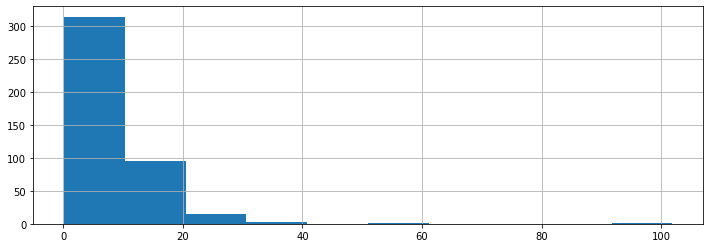

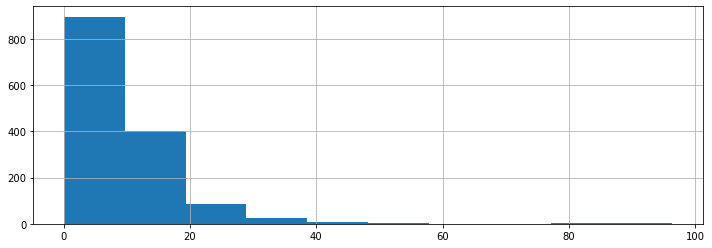

In [65]:
import matplotlib.pyplot as plt

# Looking at the distribution is errors
TestingData['APE'].hist(figsize=(12,4))
plt.show()
# Looking at the distribution is errors
FinalTestingData['APE'].hist(figsize=(12,4))

In [ ]:
# Reading the cleaned numeric car prices data
import pandas as pd
import numpy as np

# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)

BostonHousingData=pd.read_pickle("E:/Study Stuff/DataScience/Python/CaseStudies/Deep Learning/ANN/Regression/Data/BostonHousingData.pkl")
BostonHousingData.head()